# Simulate a Discrete-Time Dynamic System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from platform import python_version
print(f"Python: {python_version()}")
print(f"Jax: {jax.__version__}")

Python: 3.10.13
Jax: 0.4.16


In [2]:
def sys(yk, uk, parmas):
    a1 = params['a1']
    b0 = params['b0']
    return a1 * yk + b0 * uk

In [3]:
nT = 10
Ts = 1
t = Ts * jnp.arange(nT+1)
U = np.zeros((nT+1, 1), dtype='float32')
U[t >= 1, :] = 1.
U = jnp.array(U)

I0000 00:00:1705808237.881246       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [4]:
y0 = jnp.zeros(1, dtype='float32')
params = {
    'a1': 0.5,
    'b0': 0.5
}
Y = []
yk = y0.copy()
for k in range(nT+1):
    Y.append(yk)
    uk = U[k, :]
    yk = sys(yk, uk, params)
Y = jnp.array(Y)

index = pd.Index(t, name='t')
sim_result = pd.concat(
    [pd.DataFrame(X, index=index) for X in [U, Y]],
    axis=1,
    keys=['U', 'Y']
)
sim_result.head()

,U,Y
,0,0
t,,
0,0.0,0.000
1,1.0,0.000
2,1.0,0.500
3,1.0,0.750
4,1.0,0.875


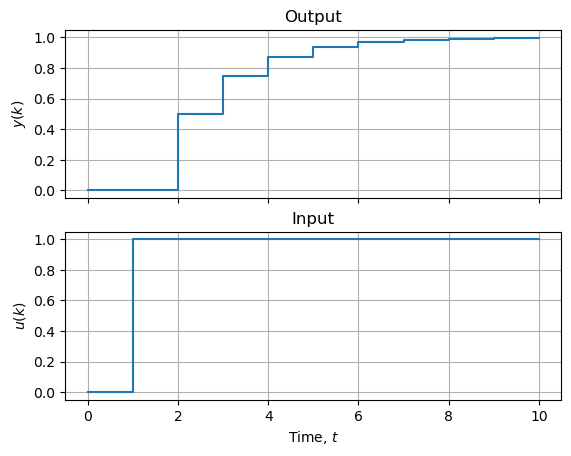

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True)

ax = axes[0]
ax.step(t, Y, where='post')
ax.set_ylabel('$y(k)$')
ax.set_title('Output')
ax.grid()

ax = axes[1]
ax.step(t, U, where='post')
ax.set_ylabel('$u(k)$')
ax.set_xlabel('Time, $t$')
ax.set_title('Input')
ax.grid()

plt.show()